# Brain Tumor Dataset
https://www.kaggle.com/jakeshbohaju/brain-tumor/version/3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import import_ipynb
from functions import *
from time import time

importing Jupyter notebook from functions.ipynb


In [2]:
data = pd.read_csv('data/brain_tumor.csv', header=0, index_col=0)
data

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
Image,,,,,,,,,,,,,,
Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155


## Data Evaluation
---

### Checking for null values

In [3]:
if data.isna().sum().sum() == 0:
    print('No missing values present')
else: 
    print('NaN values across entire dataset: ', data.isna().sum().sum())

No missing values present


### Heatmap
Feature Colliniearity
- *Multicolliniearity observed - L2 regularization ideal*

Text(0.5, 1.0, 'Brain Tumor Dataset Colliniearity')

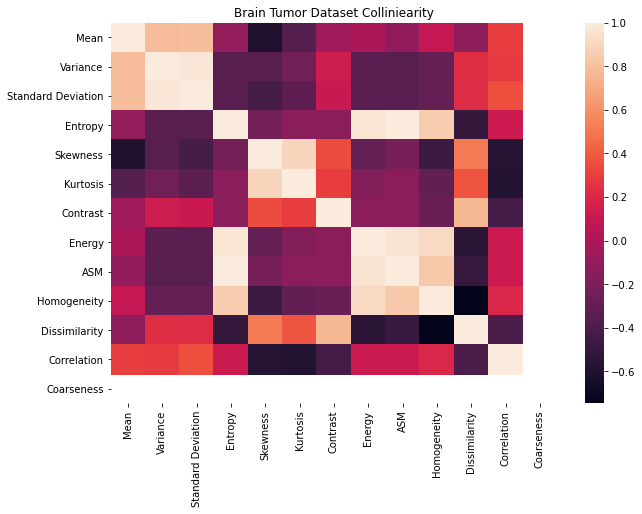

In [4]:
corr = data.loc[:, data.columns != 'Class'].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr)
plt.title('Brain Tumor Dataset Colliniearity')

### Histogram
Feature Distributions

Text(0.5, 0.92, 'Brain Tumor Dataset Feature Distributions')

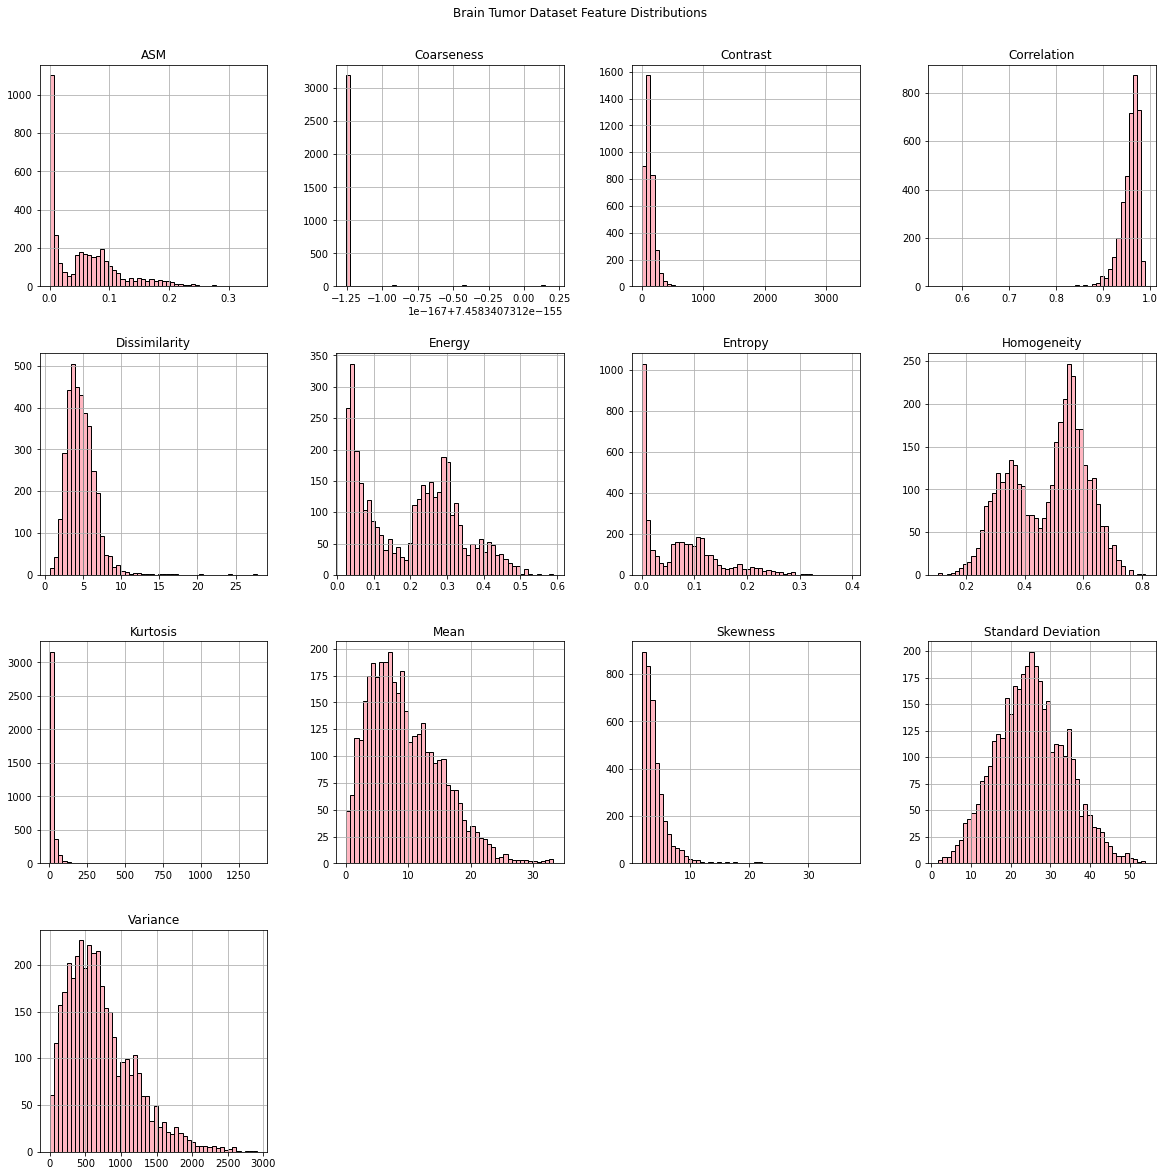

In [5]:
data.loc[:, data.columns != 'Class'].hist(bins=50, figsize=(20,20), color='lightpink', ec='black')
plt.suptitle('Brain Tumor Dataset Feature Distributions', y=0.92)

### Pie Chart 
Class Balance
- *Slight class imbalance by 10% observed*

In [6]:
class_counts = data['Class'].value_counts()
class_counts

0    2079
1    1683
Name: Class, dtype: int64

Text(0.5, 1.05, 'Brain Tumor Dataset Class Distribution')

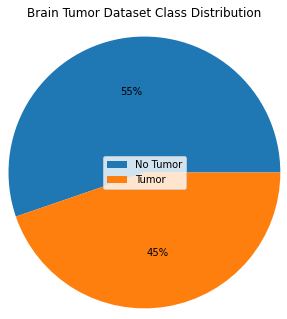

In [7]:
classes = ['No Tumor', 'Tumor']
plt.figure(figsize=(5, 5))
plt.pie(class_counts, autopct='%1.0f%%', radius=1.25)
plt.legend(labels=classes, loc='center')
plt.title('Brain Tumor Dataset Class Distribution', y=1.05)

## Data Preparation
---

In [8]:
#Train/test/val subsets
train, test = train_test_split(data, test_size=0.2)
train, val = train_test_split(train, test_size=0.1)

In [9]:
#Separating labels from data
x_test, y_test = features_labels_split(test, 'Class')
x_train, y_train = features_labels_split(train, 'Class')
x_val, y_val = features_labels_split(val, 'Class')

In [10]:
#Scaling
scaler = preprocessing.MinMaxScaler() 

x_train = scaler.fit_transform(x_train) 
x_val = scaler.transform(x_val) 
x_test = scaler.transform(x_test) 

In [11]:
#Label one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [12]:
print(f'Total samples: {x_test.shape[0] + x_train.shape[0] + x_val.shape[0]}')
print(f'Testing samples: {x_test.shape[0]}') 
print(f'Training samples: {x_train.shape[0]}')
print(f'Validation samples {x_val.shape[0]}')

Total samples: 3762
Testing samples: 753
Training samples: 2708
Validation samples 301


## Model
---

In [56]:
#Define
model = Sequential()
model.add(Dense(units=16, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Dropout(0.3))
model.add(Dense(units=2, activation="softmax"))

In [57]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_19 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_20 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 66        
Total params: 834
Trainable params: 834
Non-trainable params: 0
_________________________________________________________________


In [58]:
#Compile
model.compile(optimizer = Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [59]:
#Fit
start = time()

history = model.fit(
                x_train, 
                y_train, 
                validation_data = (x_val, y_val),
                epochs=200, 
                batch_size = 20,
                verbose=0)

print(f'Complete. \nModel trained in {round(time()-start, 2)} sec')

Complete. 
Model trained in 19.66 sec


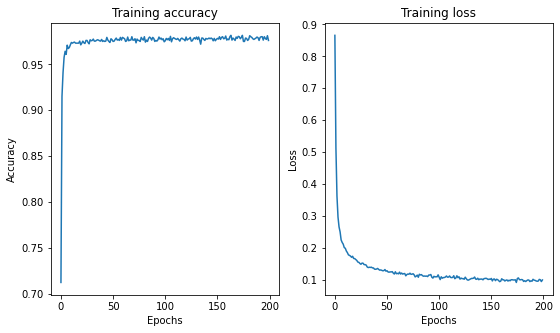


Training accuracy: 97.6%
Training loss: 0.099


In [60]:
plot_display_metrics(model, history)

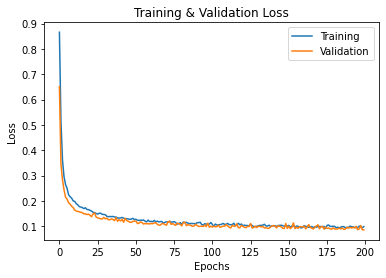


Training accuracy: 97.6%
Training loss: 0.099

Validation accuracy: 98.67%
Validation loss: 0.086


In [61]:
plot_train_val(history)

In [62]:
#Test
test_score = model.evaluate(x_test, y_test)
print(f"Testing accuracy: {round(test_score[1], 4) * 100}%")
print(f"Testing loss: {round(test_score[0], 4)}")

24/24 [==============================] - 0s 637us/step - loss: 0.1195 - accuracy: 0.9708
Testing accuracy: 97.08%
Testing loss: 0.1195


## Model Evaluation
---

### Confusion Matrix

In [63]:
#Encased in np.argmax() to convert from one-hot encoding to regular so it can work with sklearn functionality
y_pred = np.argmax(model.predict(x_test), axis=-1) 
y_true = np.argmax(y_test, axis=1)

print(np.unique(y_true)) #to check order classes appear in to correctly label confusion matrix
labels = ['No Tumor', 'Tumor']

[0 1]


Text(33.0, 0.5, 'True')

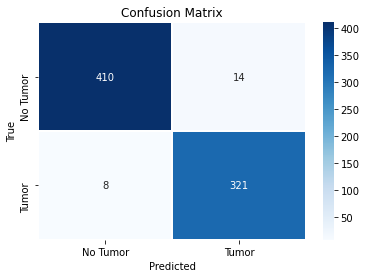

In [64]:
confusion = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(confusion, index=labels, columns=labels)

sns.heatmap(df_cm, annot=True, linewidths=0.8, fmt='d', cmap='Blues')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('True') 

In [65]:
print(f'False positives: ', confusion[0, 1])
print(f'False negatives: ', confusion[1, 0])

False positives:  14
False negatives:  8


### Model Metrics

In [66]:
print(f'Weighted Precision: {round(precision_score(y_true, y_pred, average="weighted") * 100, 2)}%')
print(f'Weighted Recall: {round(recall_score(y_true, y_pred, average="weighted") * 100, 2)}%')
print(f'Weighted F1-score: {round(f1_score(y_true, y_pred, average="weighted") * 100, 2)}%')

Weighted Precision: 97.1%
Weighted Recall: 97.08%
Weighted F1-score: 97.08%
